<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1. 
Explora tus datos de Precipitación los últimos años 1990 - fin de datos.

En este caso de Los Cabos BCS 1990-2017

## Se preparan los datos

In [ ]:
# Bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

url = 'https://raw.githubusercontent.com/FelicianoRobles/FisicaComputacional1/master/Actividad3/3005.txt' # URL de inf raw
  
my_cols = ['Fecha', 'Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)'] # Nombre a columnas
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') # Leer

df_w1 = df_dist.copy() # Se hace una copia del dataframe

str_Nulo = 'Nulo'
df_w2 = df_w1.replace(to_replace=str_Nulo, value='', regex=True) # Reemplazar Nulo por un espacio en blanco

cols_list = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
for cols in cols_list:
  df_w2[cols] = pd.to_numeric(df_w2[cols], errors='coerce') # Se convierten a números flotantes 
#df_w2.info()

# De la instrucción anterior, vemos que hay valores faltantes. Sumamos los valores nulos. 
df_w2.isnull().sum()

# Un análisis estadístico breve de las variables numéricas redondeado a 2 cifras significativas
df_w2.describe().round(2)

df_w3 = df_w2.copy() # Se hace una copia del dataframe

df_w3['Fecha']=pd.to_datetime(df_w3['Fecha'], dayfirst=True).copy() # Primer dato que sea dia
df_w3['Año'] = df_w3['Fecha'].dt.year # Columna de año
df_w3['Mes'] = df_w3['Fecha'].dt.month # Columna de mes
#df_w3.dtypes # Verificar tipos

df_meteo = df_w3.copy() # Archico con que trabajar actividad 4
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25851 entries, 0 to 25850
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       25851 non-null  datetime64[ns]
 1   Precip(MM)  25828 non-null  float64       
 2   Evap(MM)    6113 non-null   float64       
 3   Tmax(°C)    24972 non-null  float64       
 4   Tmin(°C)    24963 non-null  float64       
 5   Año         25851 non-null  int64         
 6   Mes         25851 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.4 MB
       Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)   Año  Mes
0 1937-06-01         0.0       NaN      33.0      11.0  1937    6
1 1937-06-02         0.0       NaN      33.0      11.0  1937    6
2 1937-06-03         0.0       NaN      33.0      11.0  1937    6
3 1937-06-04         0.0       NaN      32.0      11.0  1937    6
4 1937-06-05         0.0       NaN      33.0      12.0  1937 

## Grafica todo el rango de datos utilizando la función df.plot()

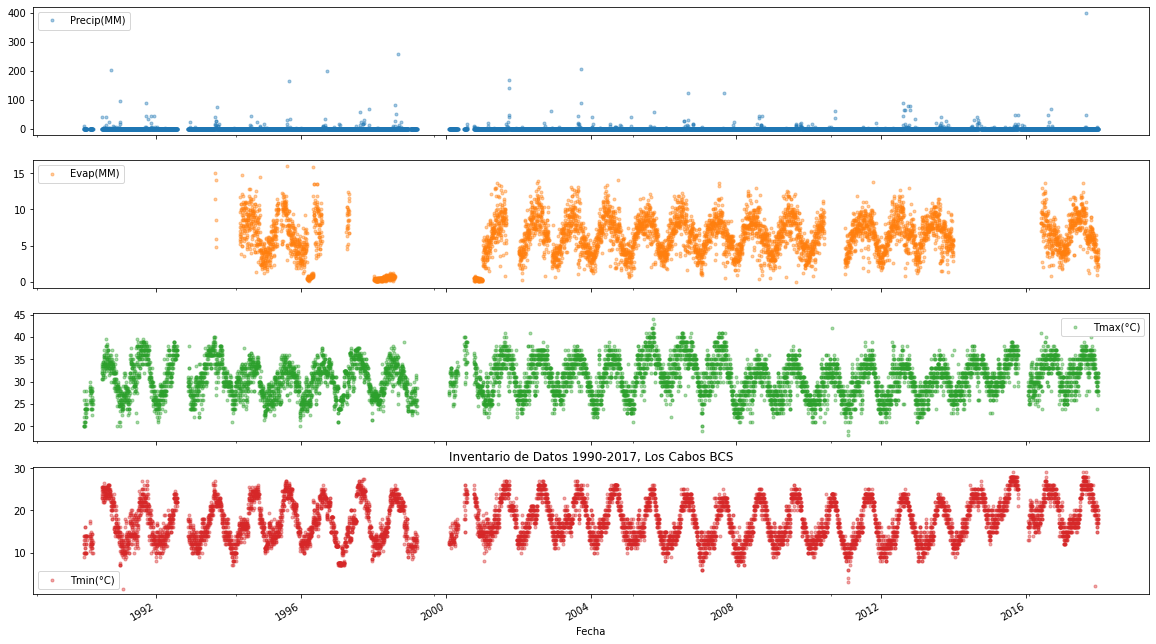

In [ ]:
df_meteo_T = df_meteo[(df_meteo['Año'] >= 1990) & (df_meteo['Año'] < 2018)] # 90 a actualidad
df_meteo_T = df_meteo_T.set_index('Fecha') # Indice 'Fecha 'del DataFrame

cols_plot = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
ax_ylabels = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
axes = df_meteo_T[cols_plot].plot(marker='.', alpha=0.4, linestyle='None',figsize=(20, 12), subplots=True) # Se grafican los datos
plt.title('Inventario de Datos 1990-2017, Los Cabos BCS'); 

## Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 


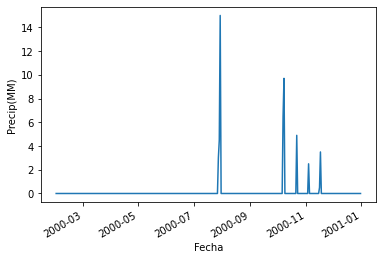

In [ ]:
ax = df_meteo_T.loc['2000','Precip(MM)'].plot()
ax.set_ylabel('Precip(MM)');

## Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot()

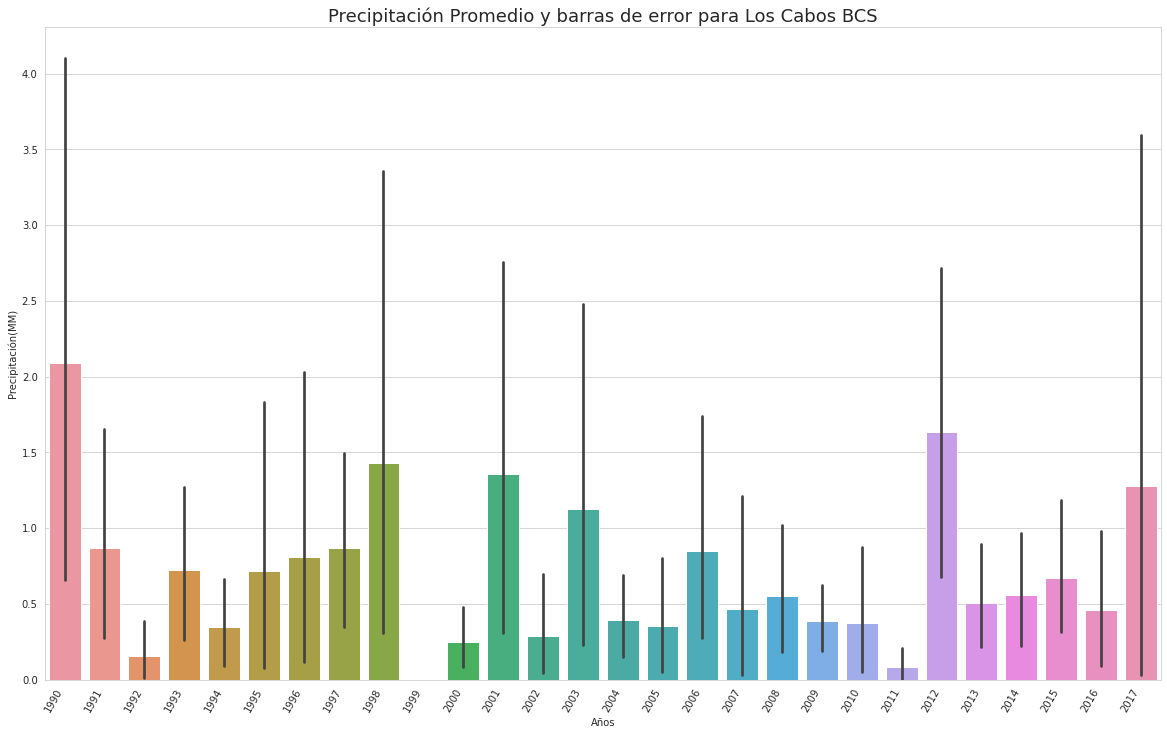

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
g =sns.barplot(x='Año', y='Precip(MM)', data=df_meteo_T); # Graficar
g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right'); # Rotar
plt.xlabel('Años')
plt.ylabel('Precipitación(MM)')
plt.title('Precipitación Promedio y barras de error para Los Cabos BCS', fontsize=18)
plt.show()

# Actividad 2. 
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

## Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 




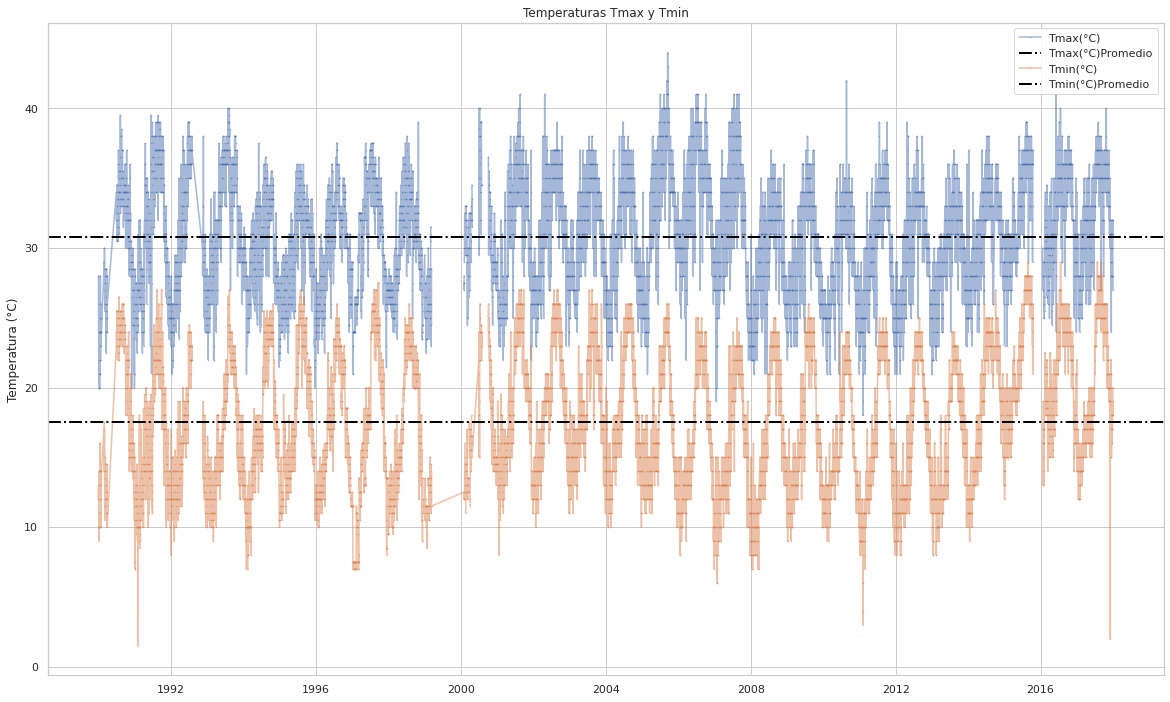

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

start, end = '1990-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax(°C)', 'Tmin(°C)']:
    ax.plot(df_meteo_T.loc[start:end, nm], marker='.', markersize=1, linestyle='-',alpha=0.5, label=nm)
    plt.axhline(df_meteo_T.loc[start:end, nm].mean(), color='black', linestyle='dashdot',linewidth=2, label=nm + 'Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (°C)')
    ax.set_title('Temperaturas Tmax y Tmin');

## Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc()

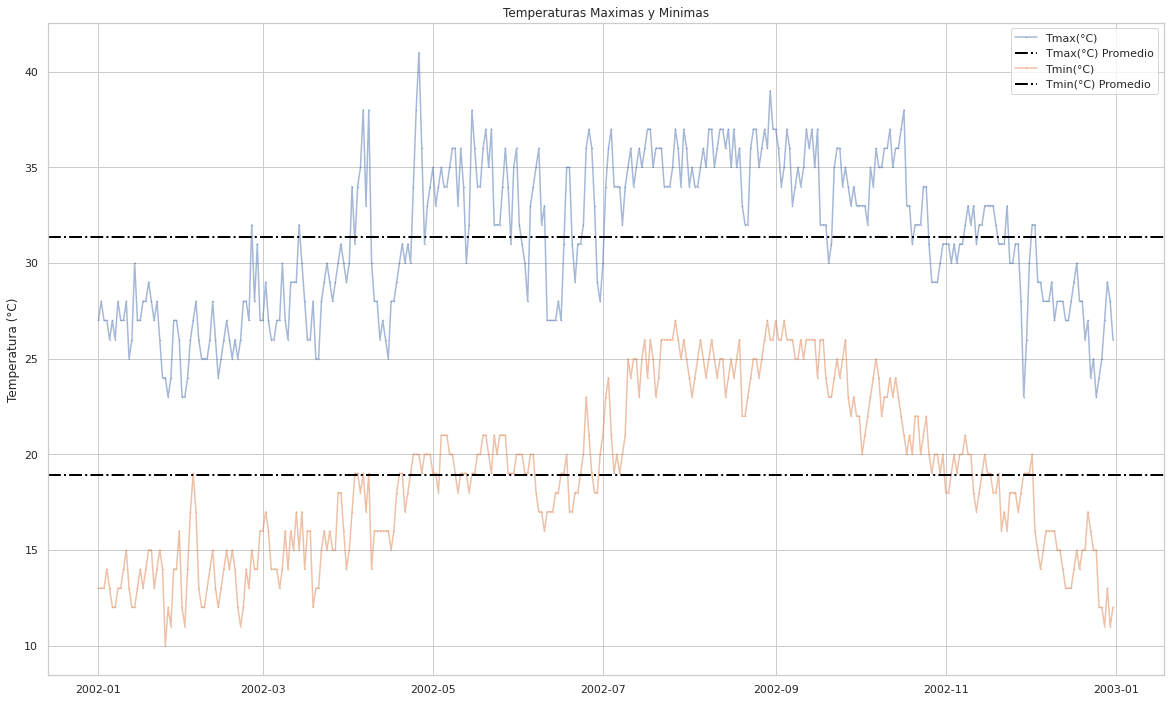

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)}) #Tamaño y estilo

start, end = '2002-01', '2002-12'

fig, ax = plt.subplots()
for nm in ['Tmax(°C)', 'Tmin(°C)']:
    ax.plot(df_meteo_T.loc[start:end, nm], marker='.', markersize=1, linestyle='-',alpha=0.5, label=nm)
    plt.axhline(df_meteo_T.loc[start:end, nm].mean(), color='black', linestyle='dashdot',linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (°C)')
    ax.set_title('Temperaturas Maximas y Minimas');

## Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  

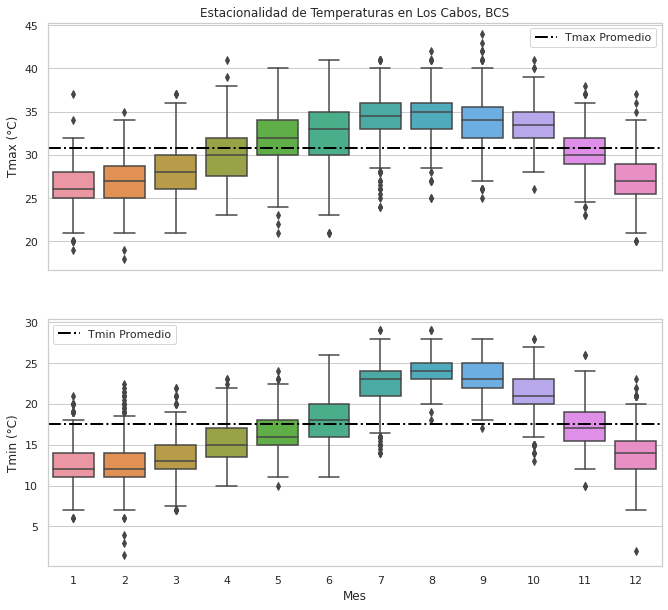

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

start, end = '1990', '2017'

# Subplot 1
f1 = sns.boxplot(data=df_meteo_T, x='Mes', y='Tmax(°C)', ax=axes[0])
l1 = axes[0].axhline(df_meteo_T.loc[start:end, 'Tmax(°C)'].mean(), color='black', linestyle='dashdot', 
                     linewidth=2, label='Tmax Promedio');
# Etiquetas 1
axes[0].legend(loc='best');
axes[0].set_ylabel('Tmax (°C)');
axes[0].set_xlabel('');
axes[0].set_title('Estacionalidad de Temperaturas en Los Cabos, BCS');

# Subplot 2
f2 = sns.boxplot(data=df_meteo_T, x='Mes', y='Tmin(°C)', ax=axes[1])
l2 = axes[1].axhline(df_meteo_T.loc[start:end, 'Tmin(°C)'].mean(), color='black', linestyle='dashdot', 
                     linewidth=2, label='Tmin Promedio');

# Etiquetas 2                      
axes[1].legend(loc='best');
axes[1].set_ylabel('Tmin (°C)');
axes[1].set_xlabel('Mes');
axes[1].set_title('');

# Actividad 3.
Explora tus datos de Evaporacion de los últimos 30 años datos a partir de 1990.  

## Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 

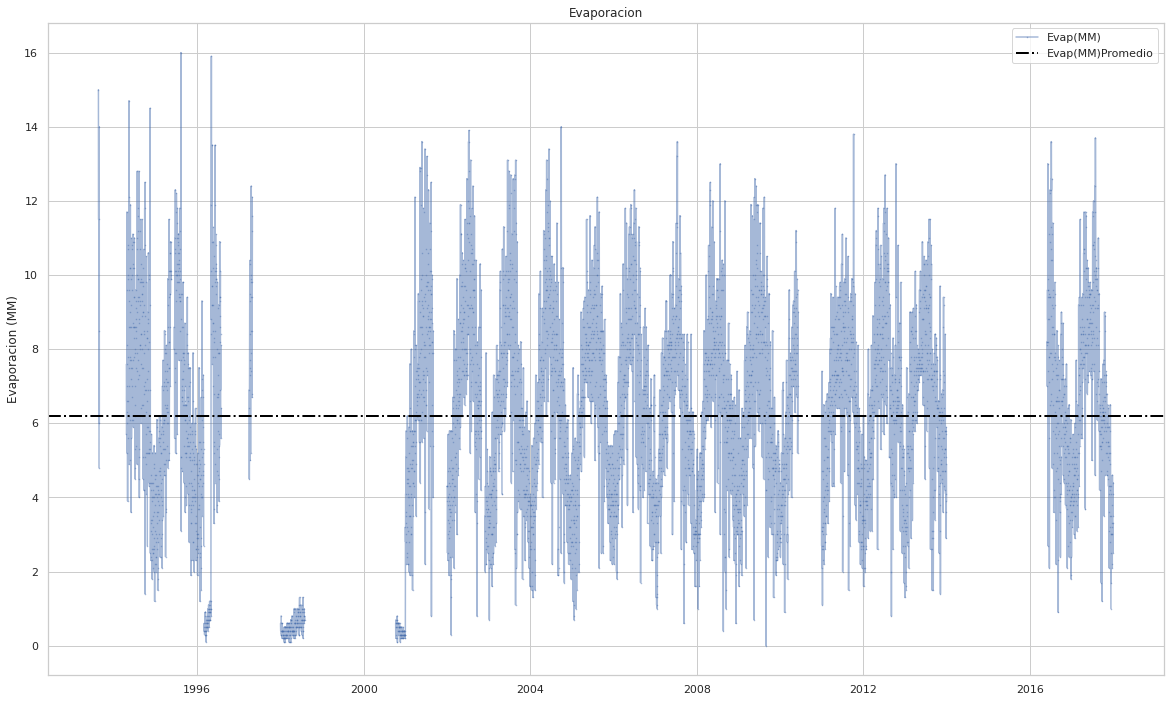

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

start, end = '1990-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Evap(MM)']:
    ax.plot(df_meteo_T.loc[start:end, nm], marker='.', markersize=1, linestyle='-',alpha=0.5, label=nm)
    plt.axhline(df_meteo_T.loc[start:end, nm].mean(), color='black', linestyle='dashdot',linewidth=2, label=nm + 'Promedio');
    
    ax.legend()
    ax.set_ylabel('Evaporacion (MM)')
    ax.set_title('Evaporacion');

## Analiza un año específico completo para la evaporacion, con apoyo de la función df.loc()

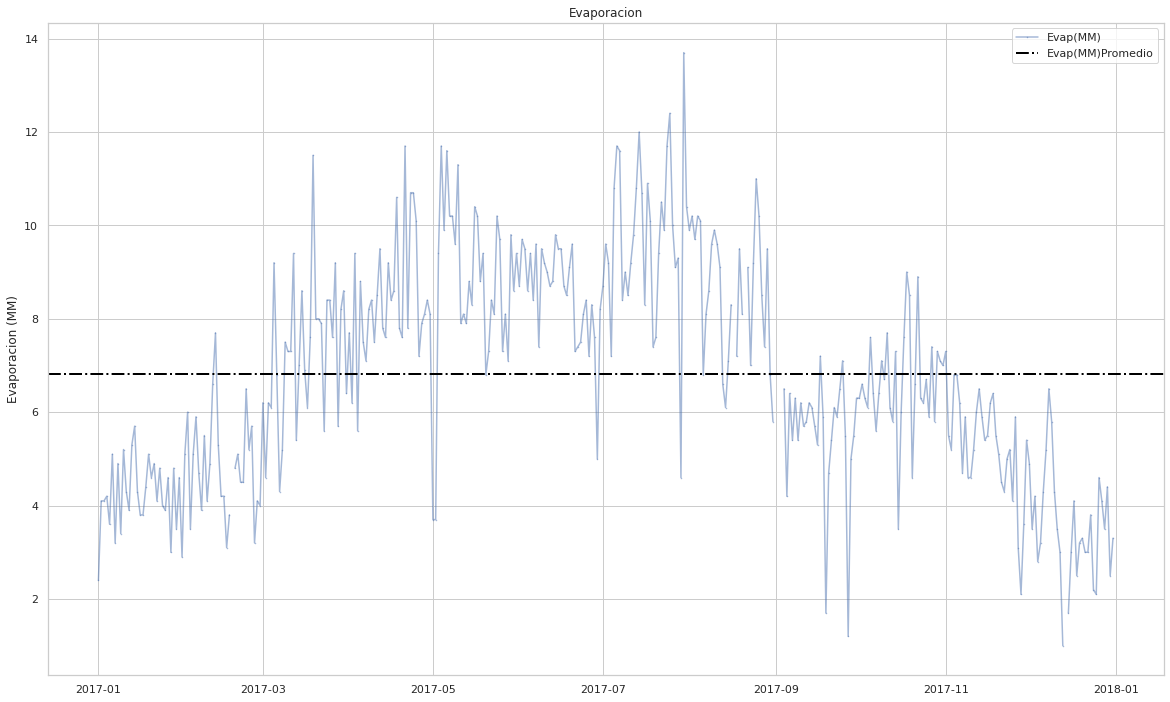

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

start, end = '2017-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Evap(MM)']:
    ax.plot(df_meteo_T.loc[start:end, nm], marker='.', markersize=1, linestyle='-',alpha=0.5, label=nm)
    plt.axhline(df_meteo_T.loc[start:end, nm].mean(), color='black', linestyle='dashdot',linewidth=2, label=nm + 'Promedio');
    
    ax.legend()
    ax.set_ylabel('Evaporacion (MM)')
    ax.set_title('Evaporacion');

## Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  

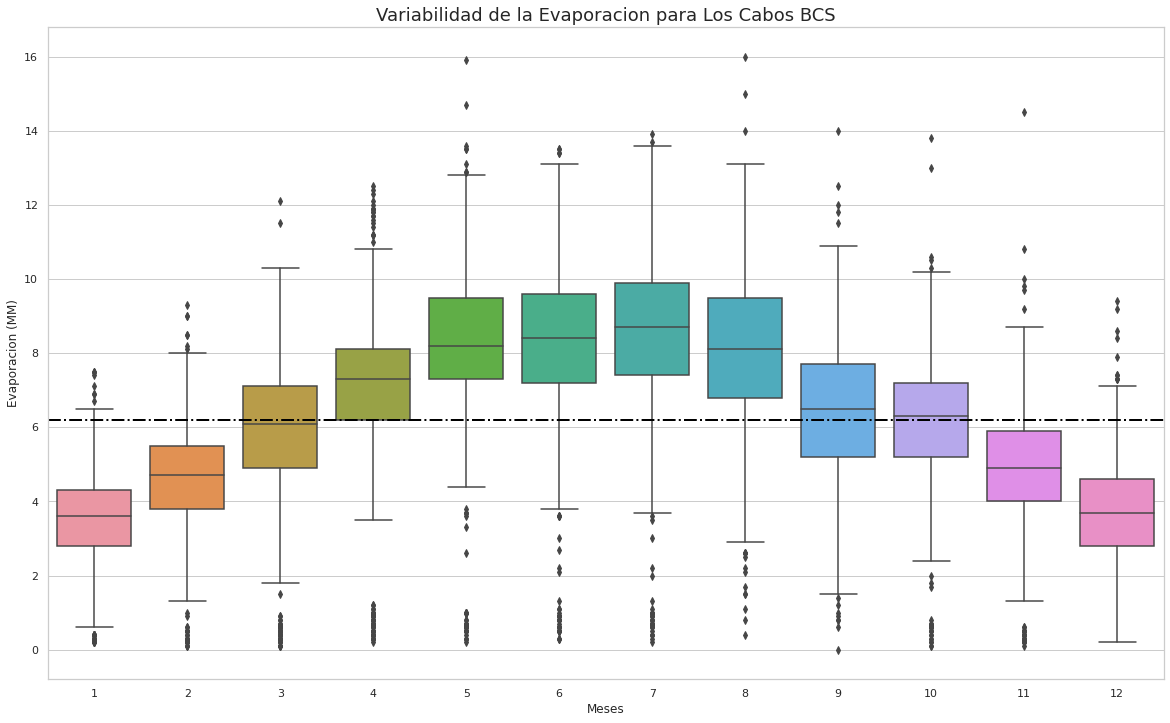

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

Evap_ave = df_meteo_T['Evap(MM)'].mean() # Promedio de Evap

g=sns.boxplot(x='Mes', y='Evap(MM)', data=df_meteo_T); # Grafica 
plt.axhline(Evap_ave, color = 'black', linestyle='dashdot', linewidth=2); # Evap promedio

plt.xlabel('Meses')
plt.ylabel('Evaporacion (MM)')
plt.title('Variabilidad de la Evaporacion para Los Cabos BCS', fontsize=18)

plt.show()

#print('mean(Evap) = ', Evap_ave)

# Actividad 4.  
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

In [ ]:
data_cols = ['Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
df_7d = df_meteo_T[data_cols].rolling(7, center=True,min_periods=1).mean()
df_30d = df_meteo_T[data_cols].rolling(30, center=True,min_periods=1).mean()
df_365d = df_meteo_T[data_cols].rolling(365, center=True,min_periods=1).mean()

## Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 

Para Temperaturas Maximas

Text(0.5, 1.0, 'Temperatura Máxima 2016-2017, Los Cabos BCS')

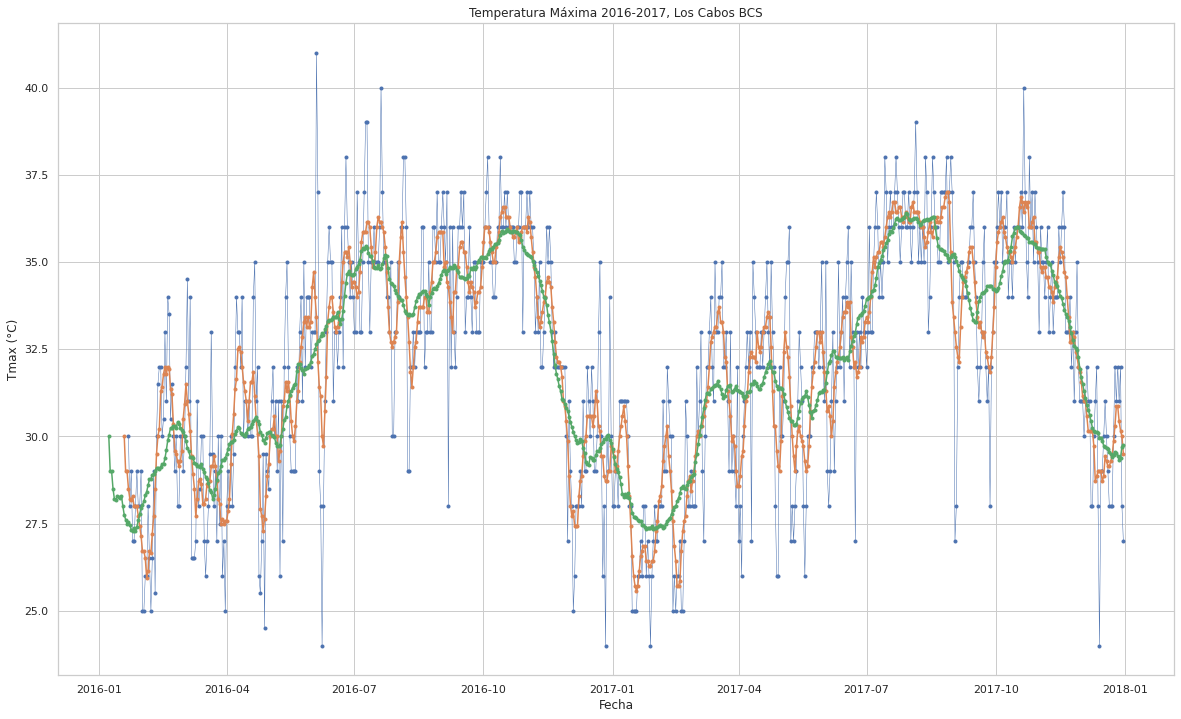

In [ ]:
start, end = '2016-01', '2017-12'

sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Tmax(°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios') # Grafica diaria
ax.plot(df_7d.loc[start:end, 'Tmax(°C)'], marker='.', linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_30d.loc[start:end, 'Tmax(°C)'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Máxima 2016-2017, Los Cabos BCS')

Para Temperaturas Minimas

Text(0.5, 1.0, 'Temperatura MInima 2016-2017, Los Cabos BCS')

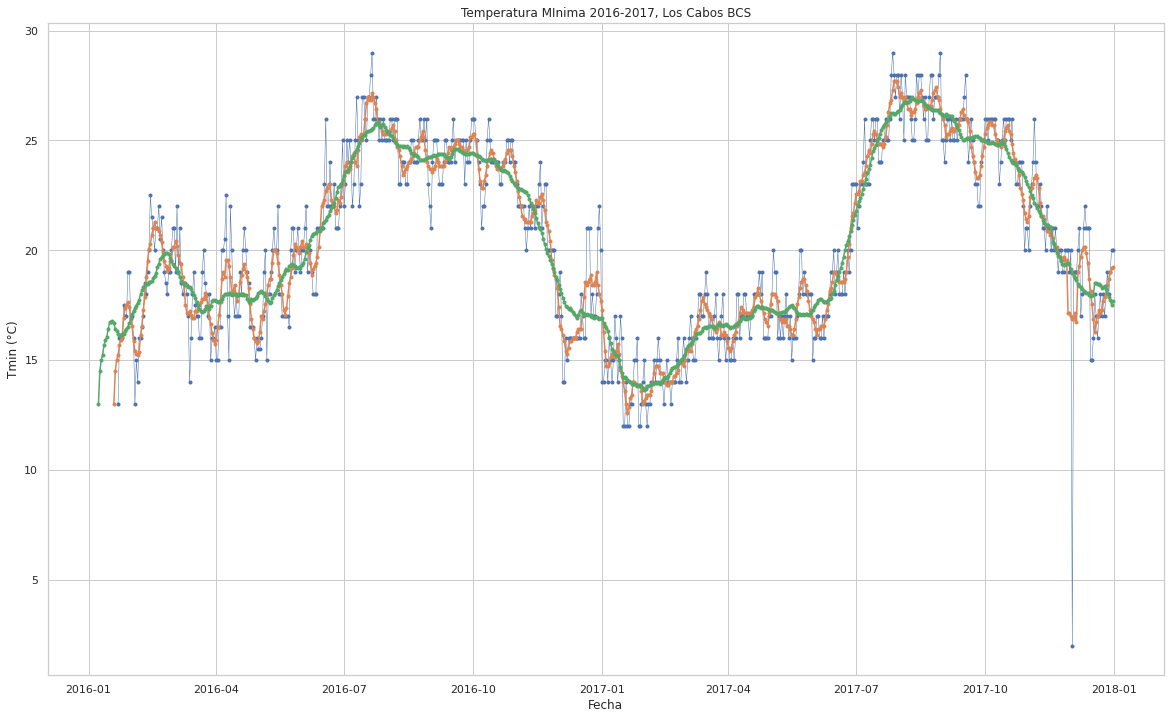

In [ ]:
start, end = '2016-01', '2017-12'

sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Tmin(°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios') # Grafica
ax.plot(df_7d.loc[start:end, 'Tmin(°C)'], marker='.', linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_30d.loc[start:end, 'Tmin(°C)'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (°C)')
ax.set_title('Temperatura MInima 2016-2017, Los Cabos BCS')

Para Evaporacion

Text(0.5, 1.0, 'Temperatura MInima 2016-2017, Los Cabos BCS')

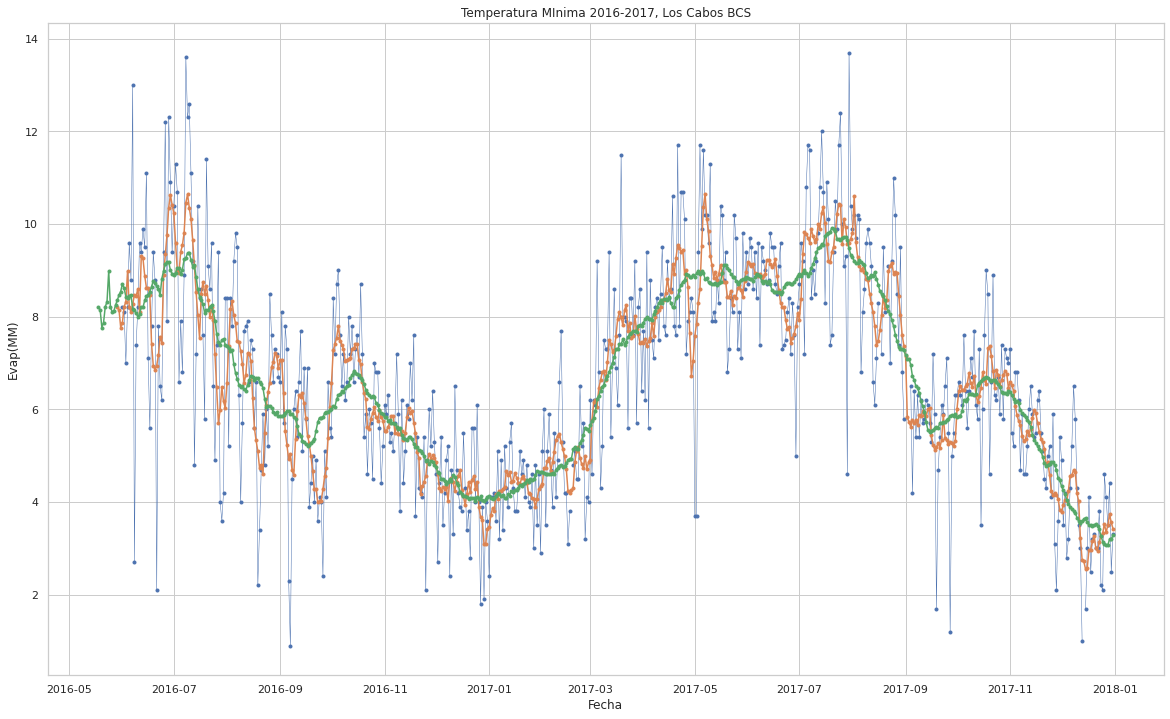

In [ ]:
start, end = '2016-01', '2017-12'

sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Evap(MM)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios') # Grafica
ax.plot(df_7d.loc[start:end, 'Evap(MM)'], marker='.', linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_30d.loc[start:end, 'Evap(MM)'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap(MM)')
ax.set_title('Temperatura MInima 2016-2017, Los Cabos BCS')

## Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

Para Temperatura Maxima


Text(0.5, 1.0, 'Temperatura Máxima 2007-2017, Los Cabos BCS')

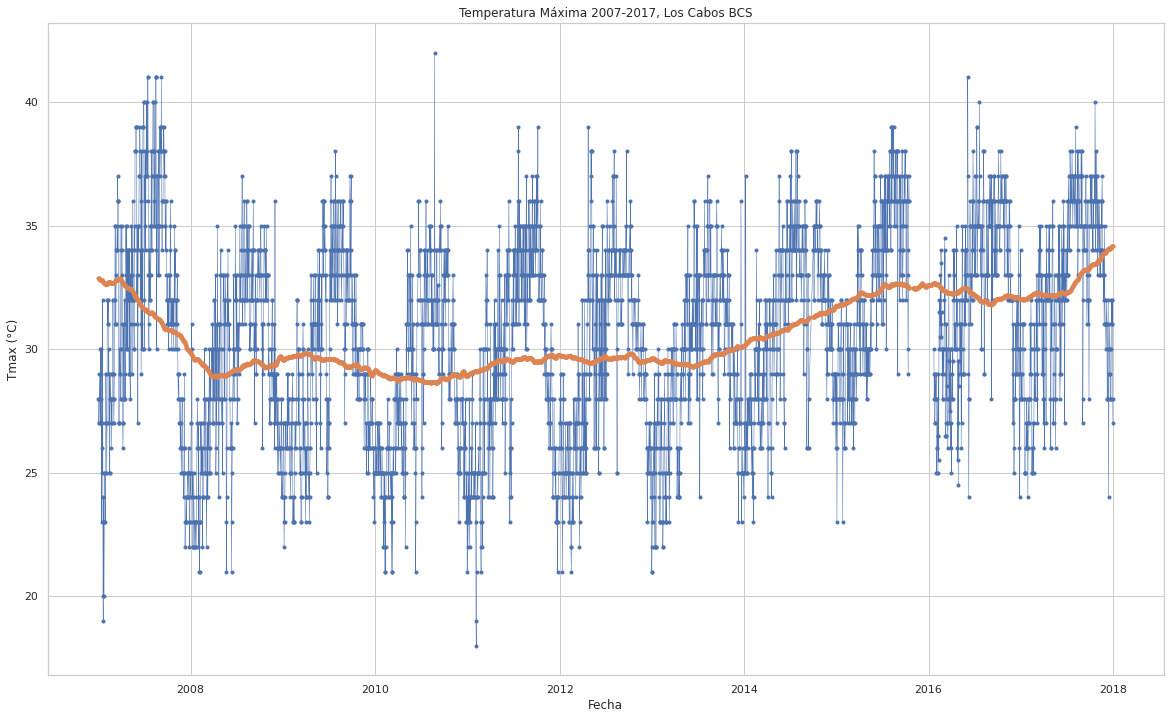

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2007-01', '2017-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Tmax(°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_365d.loc[start:end, 'Tmax(°C)'], marker='.', linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (°C)')
ax.set_title('Temperatura Máxima 2007-2017, Los Cabos BCS')

Para Temperatura Minima

Text(0.5, 1.0, 'Temperatura MInima 2007-2017, Los Cabos BCS')

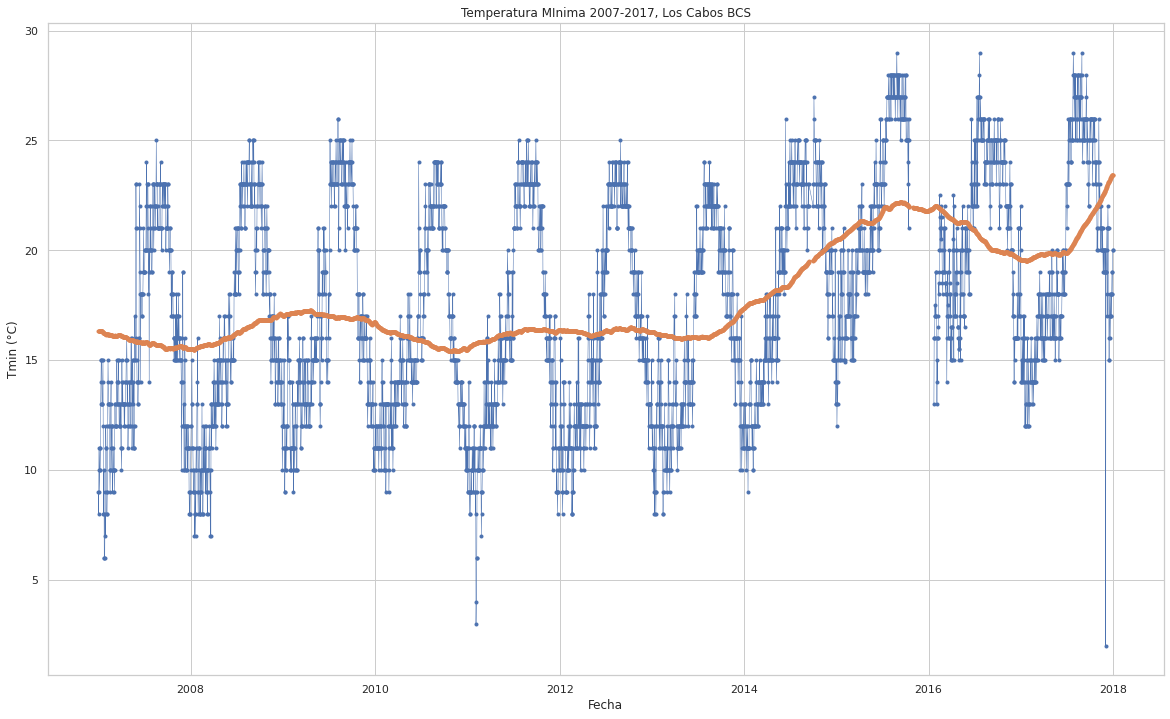

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2007-01', '2017-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Tmin(°C)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_365d.loc[start:end, 'Tmin(°C)'], marker='.', linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (°C)')
ax.set_title('Temperatura MInima 2007-2017, Los Cabos BCS')

Para Evaporacion

Text(0.5, 1.0, 'Temperatura Minima 2007-2017, Los Cabos BCS')

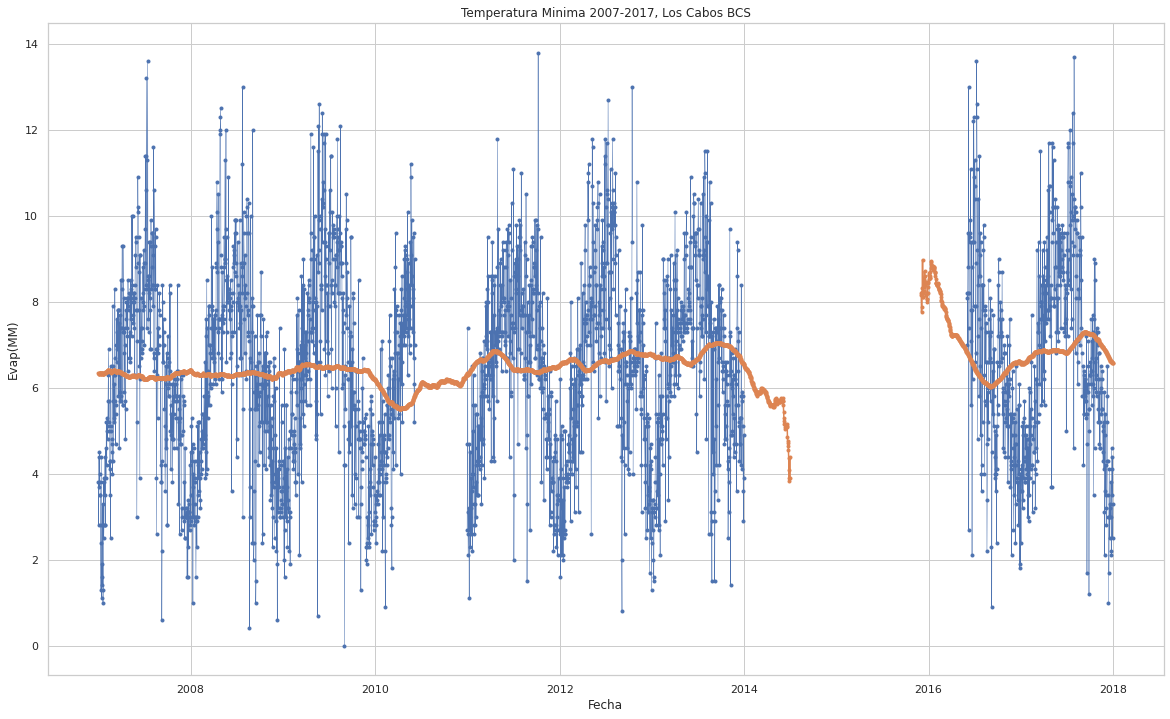

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2007-01', '2017-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

fig, ax = plt.subplots()
ax.plot(df_meteo_T.loc[start:end, 'Evap(MM)'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_365d.loc[start:end, 'Evap(MM)'], marker='.', linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap(MM)')
ax.set_title('Temperatura Minima 2007-2017, Los Cabos BCS')

# Actividad 5. 
Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

Tmax

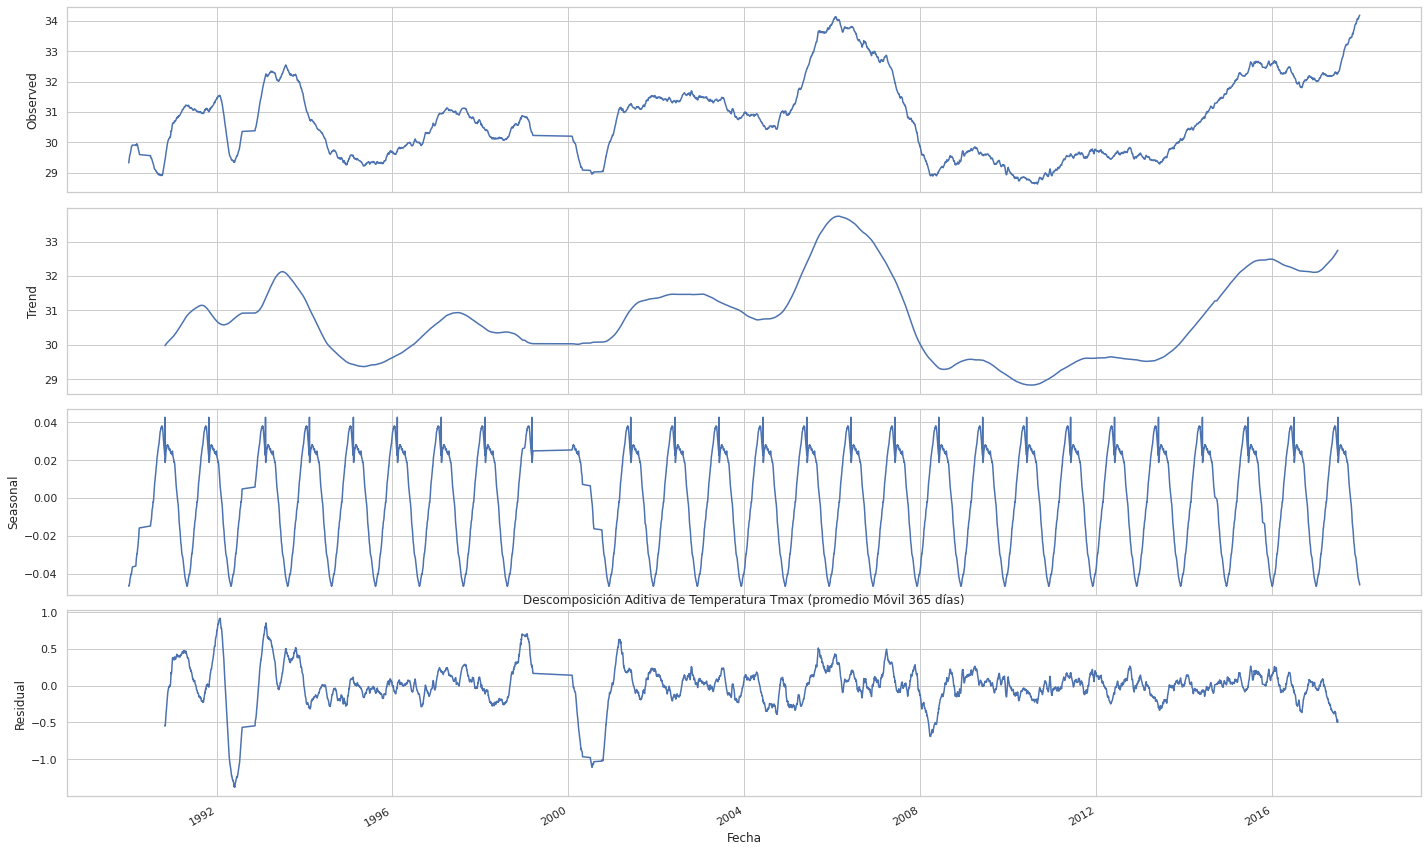

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2017-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_365d.loc[start:end, 'Tmax(°C)'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

Tmin

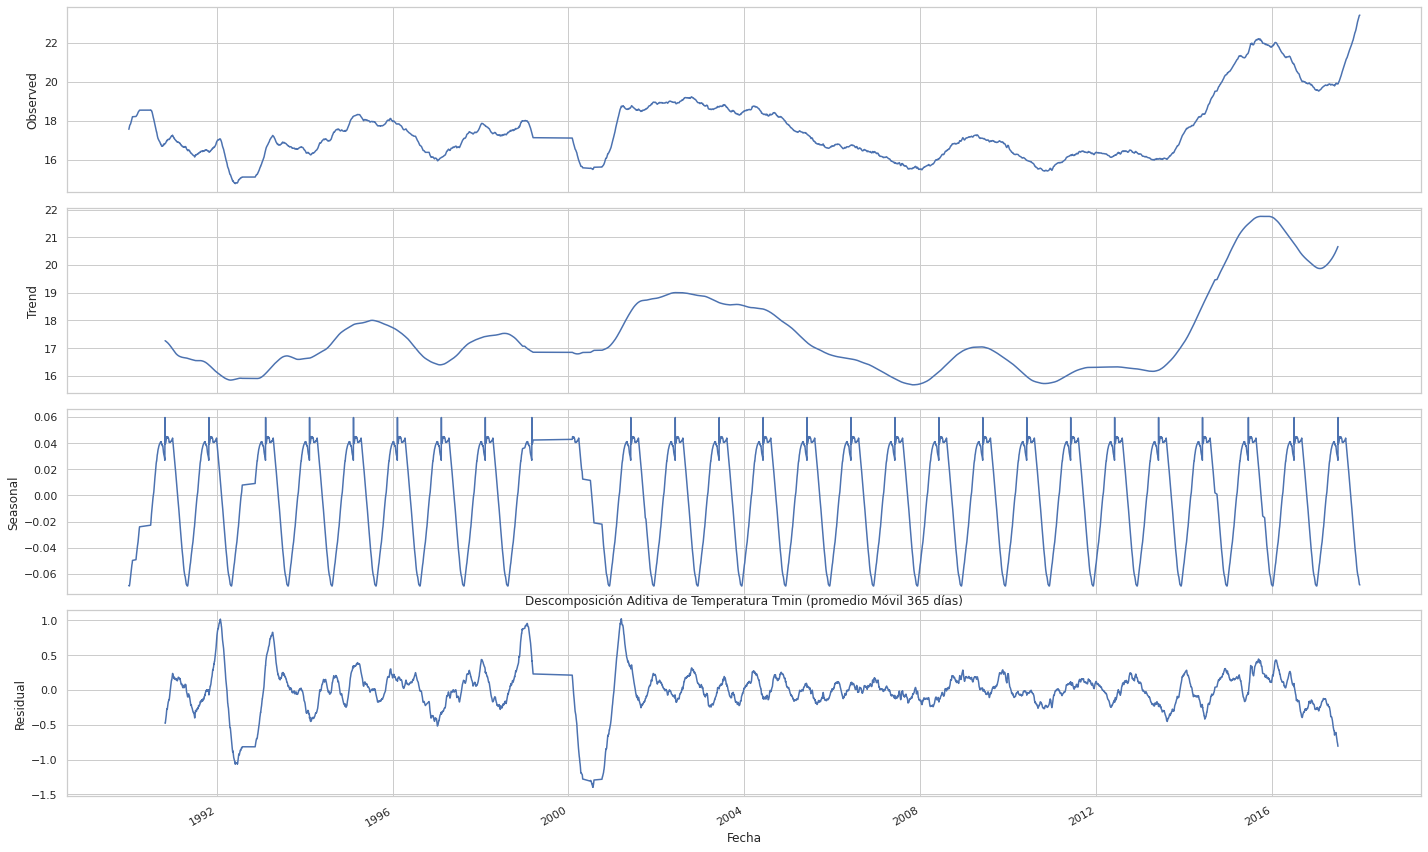

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2017-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_365d.loc[start:end, 'Tmin(°C)'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

Evaporacion

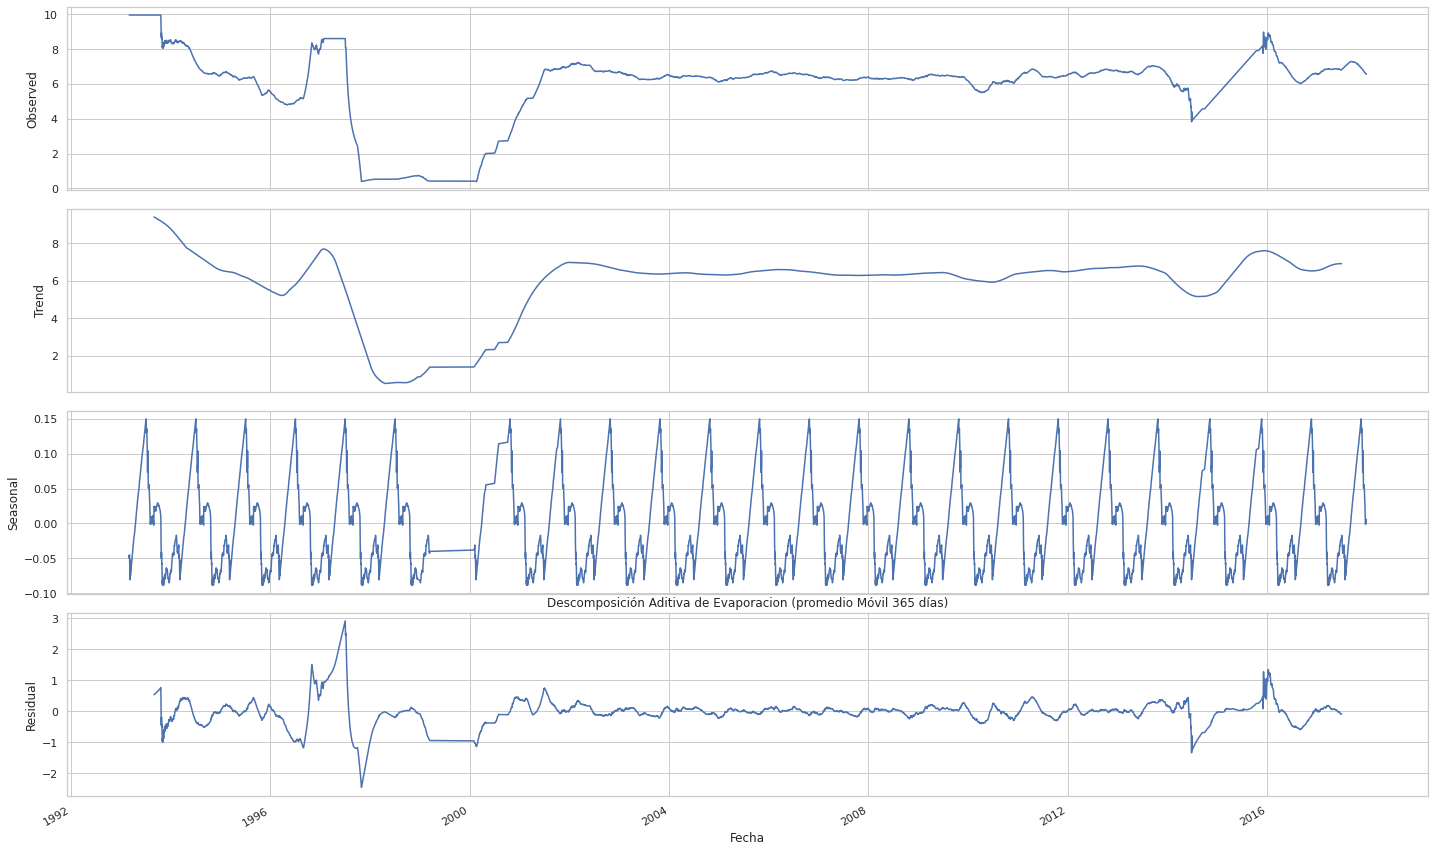

In [25]:
sns.set(style='whitegrid',rc={'figure.figsize':(20, 12)})

start, end = '1993-03', '2017-12' # Periodo de datos completos (No funciona cuando hace falta un rango de datos)

decompfreq = 365 # Ciclo anual 365 días (Por las Estaciones)

resEvap = sm.tsa.seasonal_decompose(df_365d.loc[start:end, 'Evap(MM)'].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporacion (promedio Móvil 365 días)');

# Actividad 6. 
Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos. 

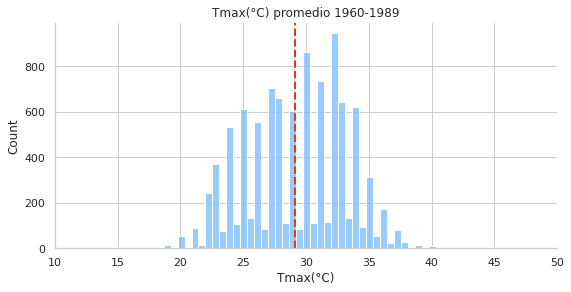

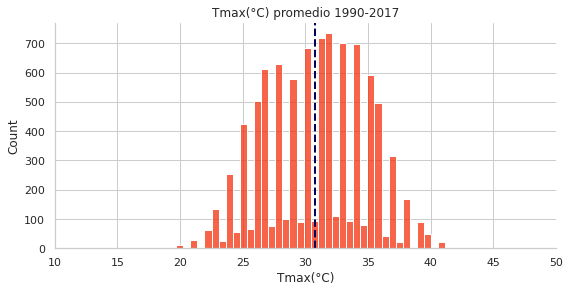

Tmax_promedio df_60 =  29.146080973274834 °C
Tmax_promedio df_90 =  30.78047375160051 °C


In [ ]:
df_30 = df_meteo_T[(df_meteo_T['Año'] >= 1960) & (df_meteo_T['Año'] < 1990)] # Periodo de 30 años
df_60 = df_meteo_T[(df_meteo_T['Año'] >= 1990) & (df_meteo_T['Año'] < 2018)] # Periodo de 30 años

g1 = sns.displot(df_30['Tmax(°C)'], color='xkcd:sky blue', height=4, aspect=2);
plt.axvline(df_30['Tmax(°C)'].mean(), linestyle='--', linewidth=2, color='xkcd:vermillion');

g2 = sns.displot(df_60['Tmax(°C)'], color='xkcd:vermillion', height=4, aspect=2);
plt.axvline(df_60['Tmax(°C)'].mean(), linestyle='--', linewidth=2, color='xkcd:dark blue');

g1.set(title='Tmax(°C) promedio 1960-1989');
g2.set(title='Tmax(°C) promedio 1990-2017');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show();

print('Tmax_promedio df_60 = ', df_30['Tmax(°C)'].mean(), '°C' )
print('Tmax_promedio df_90 = ', df_60['Tmax(°C)'].mean(), '°C' )